# Projet Machine Learning Python

    Un fichier, projetdatascience.rda, a été donné. Il est composé de 2 datasets, le premier appelé "projetTrain" et le second "projetValid". Le but ici est de créer des modèles de prédiction avec le dataset "projetTrain", que l'on aura divisé en amont en 2 : un premier échantillon pour la construction du modèle et un 2e pour le tester. Le dataset "projetValid" est la pour vérifier si notre modèle construit prédit correctement. Ces prédictions seront envoyées au professeur pour vérifier cela

<span style="color:red">
Pensez à numéroter vos sections, cela rend la lecture plus aisée
</span>

# 0)  Importation des bibliothèques qui seront utilisées

In [1]:
import csv, math, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
os.getcwd()

'/Users/romain/OneDrive/Documents/__  Memorandum/_____encours/clients/2014 07 01 - ESILV/MS/2017 2018 - seconde année/2017 - seconde année/python/devoir/a-ewoudi@hotmail.fr'

# 1) Data Management

### Importation des données et traitement

Changement du répertoire courant

In [2]:
!ls

Devoir Python.pptx   Projet+ML+3012.ipynb
Projet ML 3012.ipynb original.ipynb


En amont, le fichier projetdatascience.rda a été converti en 2 fichiers csv : projetTrain.csv et projetValid.csv

In [3]:
projetTrain = pd.read_csv('./../projetTrain.csv')

print(projetTrain)

          Id  Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
0          2               1             D3              10        0.076923   
1          5               1             A1              26        0.076923   
2          6               1             E1              26        0.076923   
3          7               1             D4              10        0.487179   
4          8               1             D2              26        0.230769   
5         11               1             A8              10        0.166194   
6         14               1             D2              26        0.076923   
7         15               1             D3              26        0.230769   
8         16               1             E1              21        0.076923   
9         18               1             D4              26        0.230769   
10        19               1             A2              26        0.102564   
11        20               2             D1         

On remarque qu'il faudra enlever la première colonne "Unnamed"

## 1.2) On peut regarder les 5 premières lignes des variables

In [4]:
print(projetTrain.head())

   Id  Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
0   2               1             D3              10        0.076923   
1   5               1             A1              26        0.076923   
2   6               1             E1              26        0.076923   
3   7               1             D4              10        0.487179   
4   8               1             D2              26        0.230769   

   Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht   ...    \
0               2               1               1  0.641791  0.581818   ...     
1               2               3               1  0.059701  0.600000   ...     
2               2               3               1  0.029851  0.745455   ...     
3               2               3               1  0.164179  0.672727   ...     
4               2               3               1  0.417910  0.654545   ...     

   Medical_Keyword_40  Medical_Keyword_41  Medical_Keyword_42  \
0              

In [5]:
# Pour voir le nombre de lignes et le nombre de colonnes
print (projetTrain.shape)

(51381, 128)


Le fichier projetTrain contient 51381 observations et 129 variables.

Par la suite, on peut décrire le dataset, pour regarder par exemple les quantiles, ou encore la moyenne des observations.

In [6]:
print (projetTrain.describe())

                 Id  Product_Info_1  Product_Info_3  Product_Info_4  \
count  51381.000000    51381.000000    51381.000000    51381.000000   
mean   39528.812635        1.026002       24.416049        0.328934   
std    22800.993433        0.159142        5.068379        0.282703   
min        2.000000        1.000000        1.000000        0.000000   
25%    19783.000000        1.000000       26.000000        0.076923   
50%    39583.000000        1.000000       26.000000        0.230769   
75%    59167.000000        1.000000       26.000000        0.487179   
max    79145.000000        2.000000       38.000000        1.000000   

       Product_Info_5  Product_Info_6  Product_Info_7       Ins_Age  \
count    51381.000000    51381.000000    51381.000000  51381.000000   
mean         2.006948        2.672097        1.042934      0.405657   
std          0.083066        0.740471        0.289806      0.197115   
min          2.000000        1.000000        1.000000      0.000000   
25%  

Suppression de la colonne Unnamed : 0

<span style="color:red">
Attention: ici, jupyter ne vous affiche pas tout, et vous ne voyez qu un sous ensmeble de des colonnes de la matrice.
    Vous avez bien vu qu il y a 127 colonnes, hors seules une dizaine sont affichés.
</span>

In [7]:
projetTrain.columns

Index(['Id', 'Product_Info_1', 'Product_Info_2', 'Product_Info_3',
       'Product_Info_4', 'Product_Info_5', 'Product_Info_6', 'Product_Info_7',
       'Ins_Age', 'Ht',
       ...
       'Medical_Keyword_40', 'Medical_Keyword_41', 'Medical_Keyword_42',
       'Medical_Keyword_43', 'Medical_Keyword_44', 'Medical_Keyword_45',
       'Medical_Keyword_46', 'Medical_Keyword_47', 'Medical_Keyword_48',
       'target'],
      dtype='object', length=128)

A la vue des variables, je vais changer la nature des variables, en mettant en facteur les variables qui devraient l'être.

# 2) modification des données

<span style="color:red">
pourquoi uniquement product info 2 ?
</span>

In [8]:
projetTrain["target"]=pd.Categorical(projetTrain["target"],ordered=False)
projetTrain["Product_Info_2"]=pd.Categorical(projetTrain["Product_Info_2"],ordered=False)
projetTrain.dtypes

Id                        int64
Product_Info_1            int64
Product_Info_2         category
Product_Info_3            int64
Product_Info_4          float64
Product_Info_5            int64
Product_Info_6            int64
Product_Info_7            int64
Ins_Age                 float64
Ht                      float64
Wt                      float64
BMI                     float64
Employment_Info_1       float64
Employment_Info_2         int64
Employment_Info_3         int64
Employment_Info_4       float64
Employment_Info_5         int64
Employment_Info_6       float64
InsuredInfo_1             int64
InsuredInfo_2             int64
InsuredInfo_3             int64
InsuredInfo_4             int64
InsuredInfo_5             int64
InsuredInfo_6             int64
InsuredInfo_7             int64
Insurance_History_1       int64
Insurance_History_2       int64
Insurance_History_3       int64
Insurance_History_4       int64
Insurance_History_5     float64
                         ...   
Medical_

<span style="color:red">
pouquoi cela ici ? 
</span>

0    0.148536
1    0.131799
2    0.288703
3    0.205021
4    0.234310
Name: Wt, dtype: float64


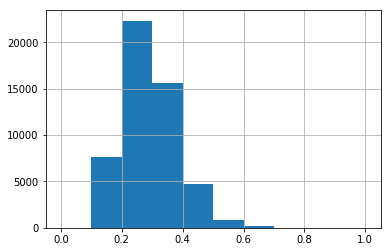

In [9]:
print(projetTrain["Wt"].head())
projetTrain["Wt"].hist()
plt.show()

Je vais par la suite rechercher les valeurs manquantes, et supprimer des variables si le pourcentage de valeurs manquantes est trop important à mes yeux, ou imputer par la médiane.

## 2.2) Supprimer les  colonnes avec + de 50% de nuls

<span style="color:red">
j'ai renommé les variables pour un code plus clair
</span>

In [10]:
# 1) on compte le nb de nul par colonne
nb_nul_par_colonne = projetTrain.isnull().sum()
nb_nul_par_colonne.head()

Id                0
Product_Info_1    0
Product_Info_2    0
Product_Info_3    0
Product_Info_4    0
dtype: int64

In [11]:
# 2) on convertit en pct
nb_ligne                = projetTrain.shape[0]
pct_vide_par_colonne    = (nb_nul_par_colonne/nb_ligne)
colonnes_avec_des_nuls  = pct_vide_par_colonne[pct_vide_par_colonne>0]
colonnes_avec_des_nuls

Employment_Info_1      0.000350
Employment_Info_4      0.114556
Employment_Info_6      0.183336
Insurance_History_5    0.426325
Family_Hist_2          0.482377
Family_Hist_3          0.577373
Family_Hist_4          0.322551
Family_Hist_5          0.705105
Medical_History_1      0.150133
Medical_History_10     0.990639
Medical_History_15     0.750589
Medical_History_24     0.936105
Medical_History_32     0.981550
dtype: float64

In [12]:
# 3) on fixe une limite
limite_de_vide      = 50/100
colonnes_a_eliminer = colonnes_avec_des_nuls[colonnes_avec_des_nuls >limite_de_vide]
colonnes_a_eliminer

Family_Hist_3         0.577373
Family_Hist_5         0.705105
Medical_History_10    0.990639
Medical_History_15    0.750589
Medical_History_24    0.936105
Medical_History_32    0.981550
dtype: float64

<span style="color:red">
j'utilise le keys de la serie pour le drop
</span>

In [13]:
# 4) et on supprimer les colonnes sous la limite
projetTrain = projetTrain.drop(colonnes_a_eliminer.keys(), axis=1)

## 2.3) Remplir les nuls avec la médiane par colonne

In [14]:
projetTrain.median().head()

Id                39583.000000
Product_Info_1        1.000000
Product_Info_3       26.000000
Product_Info_4        0.230769
Product_Info_5        2.000000
dtype: float64

In [15]:
projetTrain=projetTrain.fillna(projetTrain.median())
projetTrain.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
count,51381.000000,51381.000000,51381.000000,51381.000000,51381.000000,51381.000000,51381.000000,51381.000000,51381.000000,51381.000000,...,51381.000000,51381.000000,51381.000000,51381.000000,51381.000000,51381.000000,51381.000000,51381.000000,51381.000000,51381.000000
mean,39528.812635,1.026002,24.416049,0.328934,2.006948,2.672097,1.042934,0.405657,0.707231,0.292492,...,0.013682,0.056772,0.010043,0.045678,0.010841,0.007824,0.013721,0.008700,0.019910,0.054456
std,22800.993433,0.159142,5.068379,0.282703,0.083066,0.740471,0.289806,0.197115,0.074177,0.088967,...,0.116169,0.231409,0.099709,0.208789,0.103553,0.088107,0.116332,0.092867,0.139693,0.226917
min,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19783.000000,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39583.000000,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,59167.000000,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,79145.000000,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,0.970149,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 2.4) Transformation des dummies

In [16]:
# Transformation de la variable Product_Info_2 en dummies
# Table des indicatrices
projetTrain_dummies=pd.get_dummies(projetTrain, columns=["Product_Info_2"], drop_first=False)


In [17]:
projetTrain=projetTrain_dummies.copy()

In [18]:
projetTrain.columns

Index(['Id', 'Product_Info_1', 'Product_Info_3', 'Product_Info_4',
       'Product_Info_5', 'Product_Info_6', 'Product_Info_7', 'Ins_Age', 'Ht',
       'Wt',
       ...
       'Product_Info_2_B2', 'Product_Info_2_C1', 'Product_Info_2_C2',
       'Product_Info_2_C3', 'Product_Info_2_C4', 'Product_Info_2_D1',
       'Product_Info_2_D2', 'Product_Info_2_D3', 'Product_Info_2_D4',
       'Product_Info_2_E1'],
      dtype='object', length=140)

# 3) Séparation des données de projetTrain en 2 échantillons

On sépare dans un premier temps nos variables à expliquer et nos variables explicatives

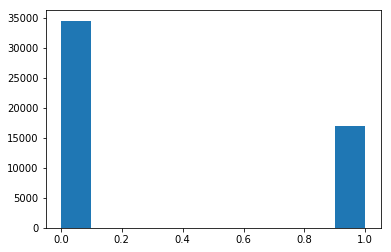

In [19]:
plt.hist(projetTrain["target"])
plt.show()
# Penser à faire un barplot ou une boite à moustache à la place

<span style="color:red">
On ne peut pas prendre les 5000 ères lignes : l'ordre des données peut être du à une manipulation de la source => il faut randomiser
+
pourquoi prendre un nombre limité de lignes ? 
+
la fonction train_test_split randomise déjà et fait le travail.
</span>

In [20]:
y = projetTrain.target[0:5000]
X = projetTrain.drop(['target'], axis=1)[0:5000]


In [21]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

Nous mettons arbitrairement 20% des données pour l'échantillon test, avec un seed à 314 pour retrouver les mêmes résultats si on recommence la manipulation plus tard. J'ai stratifié par y (target) pour etre sur que la composition en valeurs de la variable target reste la même entre train et test.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=314, 
                                                    stratify=y)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(4000, 139) (1000, 139) (4000,) (1000,)


# 4) Etude du jeu de données avec 3 méthodes

La problématique ici est la classification, on va donc utiliser des méthodes qui s'y prêtent (SVM, RandomForest et GBM).

La recherche des bons paramètres et la création du modèle ayant duré plus de 16h sans aboutir, je décide de réduire le nombre de lignes et de variables, pour pouvoir avoir certes un modèle moins précis, avec un AUC plus petit, mais sortir un résultat tout de même.

# 4.1)  Sélection de variables en univarié

In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [24]:
test = SelectKBest(score_func=chi2, k=15)
fit = test.fit(X_train, y_train)

np.set_printoptions(precision=3)
print(fit.scores_)

[  4.243e+03   2.263e-02   4.400e+01   1.809e+01   8.432e-03   2.722e-01
   3.894e-02   1.608e+01   6.420e-01   1.898e+01   2.446e+01   1.823e-02
   3.626e-03   7.106e-01   2.015e-05   2.375e+00   7.280e-02   5.579e+00
   3.755e-02   3.946e-01   7.417e-01   6.675e-01   2.806e+01   9.534e-01
   5.144e-01   1.803e+00   5.939e+00   5.945e+00   3.584e-02   5.739e+00
   1.728e-03   1.445e+00   4.884e+00   2.710e-01   1.304e+00   1.877e+02
   1.067e+02   5.616e-02   5.363e+01   1.297e-01   2.979e+00   2.891e-03
   1.755e-01   8.137e-01   2.664e-04   1.650e-01   3.348e+00   7.891e-02
   1.750e+01   1.111e-01   1.605e-01   1.516e-04   4.612e-02   8.881e-01
   7.669e-02   1.159e+02   2.425e-03   1.338e-03   1.243e-01   1.249e-01
   4.028e+00   8.126e-01   2.217e-02   7.497e+00   1.003e+00   4.845e-04
   2.585e-03   1.205e-01   2.717e-02   6.723e+00   6.680e-01   1.068e+00
   2.216e+01   6.561e+00   8.868e+01   4.066e+00   2.324e+00   4.052e+00
   5.829e-01   7.793e+00   2.070e-01   5.537e+00   

In [25]:
features = fit.transform(X_train)
print(features[0:5,:]) # description des features sélectionnées

[[  6.069e+03   2.600e+01   4.000e+00   3.870e+02   2.000e+00   3.000e+00
    0.000e+00   0.000e+00   0.000e+00   0.000e+00   0.000e+00   0.000e+00
    0.000e+00   0.000e+00   1.000e+00]
 [  4.059e+03   2.600e+01   1.000e+00   3.350e+02   2.000e+00   3.000e+00
    0.000e+00   0.000e+00   0.000e+00   0.000e+00   0.000e+00   0.000e+00
    0.000e+00   1.000e+00   0.000e+00]
 [  2.867e+03   2.600e+01   4.000e+00   1.620e+02   1.000e+00   3.000e+00
    0.000e+00   0.000e+00   1.000e+00   0.000e+00   0.000e+00   0.000e+00
    0.000e+00   0.000e+00   0.000e+00]
 [  1.839e+03   2.600e+01   5.000e+00   1.200e+02   1.000e+00   3.000e+00
    0.000e+00   0.000e+00   0.000e+00   0.000e+00   0.000e+00   0.000e+00
    0.000e+00   0.000e+00   1.000e+00]
 [  3.255e+03   2.600e+01   2.200e+01   4.910e+02   2.000e+00   3.000e+00
    0.000e+00   0.000e+00   0.000e+00   0.000e+00   1.000e+00   0.000e+00
    0.000e+00   0.000e+00   1.000e+00]]


## 4.2)  SVM : Support Vector Machine

La variable a expliquer y étant de nature catégorielle, je peux utiliser une régression logistique

### 4.2.1) Modèle

In [26]:
from sklearn import svm

Je sélectionne les variables les plus importantes

In [27]:
svm_model = svm.SVC()

On va essayer de tuner les paramètres du modèle pour améliorer la prédiction. Pour SVM, les paramètres ayant le poids le plus important sont C, kernel et gamma. On va essayer de trouver tous ces paramètres à l'aide de gridsearch, grâce auquel on va mesurer la performance des paramètres en validation croisée.

In [ ]:
from sklearn.model_selection import GridSearchCV

Combinaisons de paramètres à évaluer : 5 x 2 x 6 = 60 configurations

<span style="color:red">
rajouter le paramètre : n_jobs =-1 pour utiliser tous les coeurs de la machine
</span>

In [ ]:
parametres = [{'C':[0.1, 0.5, 1, 5, 10],'kernel':['rbf','linear'], 'gamma':[0.01,0.03,0.05,0.10,0.3,0.5]}]
parametres = [{'C':[0.1 ],'kernel':['linear'], 'gamma':[0.01 ]}]

grid = GridSearchCV(estimator=svm_model,param_grid=parametres,scoring='accuracy', n_jobs=-1)

In [ ]:
grille = grid.fit(X_train[:200],y_train[:200])

Résultat pour chaque combinaison :

In [ ]:
print(pd.DataFrame.from_dict(grille.cv_results_).loc[:,["params","mean_test_score"]])

Meilleur paramètrage :

In [ ]:
print(grille.best_params_) 

Le meilleur modèle est celui avec le plus grand AUC (meilleure performance) :

In [ ]:
print(grille.best_score_)

###  4.2.2) Prédiction

Prédiction avec le modèle « optimal » (meilleur paramètrage) :

In [ ]:
y_pred1 = grille.predict(X_test)

AUC avec l'échantillon test :

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred1))

###  4.2.3) Matrice de confusion (Représentation Seaborn):

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred1)
print(cnf_matrix)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
sns.heatmap(cnf_matrix, square=True, annot=True, cbar=False
            , xticklabels=list(projetTrain.target)
            , yticklabels=list(projetTrain.target))
plt.xlabel('valeurs prédites'),
plt.ylabel('valeurs réelles');
plt.show()

### 4.2.3)  Sélection des meilleures variables pour le modèle

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
svm_model2 = svm.SVC(C=0.1, gamma = 0.01, kernel = 'linear')

In [ ]:
selecteur = RFE(estimator=svm_model2)

In [ ]:
sol = selecteur.fit(X_train,y_train)

In [ ]:
#nombre de var. sélectionnées
print(sol.n_features_)

In [ ]:
# Feature importances 
importance = grille.feature_importances_

# Ordonner les feature importances 
class_importances = np.argsort(importance)
padding = np.arange(len(names)-1) + 0.5
plt.barh(padding, importance[sorted_importances], align='center')

In [ ]:
# Customize the plot
plt.yticks(padding, names[sorted_importances])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")

# Show the plot
plt.show()

## 4.3) Régression logistique

In [28]:
from sklearn import linear_model, datasets
from sklearn.linear_model import LogisticRegression
from sklearn import metrics # Pour la mesure de performance

In [29]:
reglog = LogisticRegression()
modele = reglog.fit (X_train, y_train)

In [30]:
print(modele.coef_,modele.intercept_)

[[  3.190e-05  -4.444e-01   9.221e-03   3.550e-01  -5.661e-01  -5.092e-02
    2.061e-01  -4.242e-01   4.631e-01  -3.712e+00  -6.954e+00   1.466e-01
   -2.737e-02  -8.363e-02   2.141e-01   3.013e-01   1.866e-01  -3.194e-01
   -7.856e-01  -3.981e-03   2.090e-01  -3.024e-01   1.930e-01  -3.181e-01
   -8.828e-02  -1.104e-01  -1.810e-01  -5.113e-02   9.988e-03  -6.581e-02
   -4.834e-02  -1.357e-01   5.089e-01   4.491e-01   5.212e-01   1.183e-03
    2.004e-04  -1.055e-01   1.488e+00  -1.640e+00  -9.564e-02   1.239e-01
   -2.034e-01  -5.782e-02  -2.845e-01  -3.994e-02   7.851e-02   1.384e-02
    1.647e-01   6.535e-01  -1.436e-01  -2.760e-01   8.018e-01   9.876e-02
    5.306e-01   3.835e-01  -2.666e-01  -3.106e-01   1.953e-01  -2.389e-01
    1.682e-02  -1.355e+00   3.708e-01   8.062e-02   3.003e-02  -1.356e-01
   -1.445e-02   1.257e-01  -2.866e-01   1.612e-01   7.159e-01   6.742e-02
   -1.758e-01  -5.865e-01  -2.071e+00  -2.387e-01  -2.773e-01   6.728e-01
    1.360e-01   3.044e-01   3.372e-01 

###  4.3.1) Prédiction

In [31]:
y_pred3 = modele.predict(X_test)

# Matrice de confusion
mc = metrics.confusion_matrix(y_test,y_pred3)
print(mc)

[[587  86]
 [104 223]]


In [32]:
# AUC
AUC = metrics.accuracy_score(y_test,y_pred3)
print(AUC) # 0.809 

0.81


In [33]:
# Taux d'erreur
err = 1.0 - AUC
print(err) # 0.191 = 1.0 – 0.809

0.19


In [34]:
# Sensibilité (ou rappel)
se = metrics.recall_score(y_test,y_pred3)
print(se) # 0.67 

0.681957186544


## 4.4) Random Forest

### 4.4.1) Modèle

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection

### 4.4.2) Estimation du meilleur n_estimators

In [36]:
seed = 123

rfc = RandomForestClassifier(n_jobs=-1, oob_score = True, max_depth=10, max_features='sqrt', min_samples_leaf = 1) 

<span style="color:red">
Le Kfold est inclu dans la fonctoin cross_val_Score : 
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
cv : int, cross-validation generator or an iterable, optional

Determines the cross-validation splitting strategy. Possible inputs for cv are:

None, to use the default 3-fold cross validation,
integer, to specify the number of folds in a (Stratified)KFold,
An object to be used as a cross-validation generator.
An iterable yielding train, test splits.
For integer/None inputs, if the estimator is a classifier and y is either binary or multiclass, StratifiedKFold is used. In all other cases, KFold is used.

Refer User Guide for the various cross-validation strategies that can be used here.
</span>

In [38]:
from sklearn.model_selection import KFold

In [41]:
seed = 123

rfc = RandomForestClassifier(n_jobs=-1, oob_score = True, max_depth=10, max_features='sqrt', min_samples_leaf = 1) 
 
n_estim = filter(lambda x: x % 2 == 0, list(range(10,20)))
 
cv_scores = []
 
for i in n_estim:
    rfc.set_params(n_estimators=i)
    kfold = KFold(n_splits=10, random_state=seed)
    scores = model_selection.cross_val_score(rfc, X_train, y_train, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    
optimal_n_estim = cv_scores.index(max(cv_scores))
print("Le nombre optimal d'estimateurs est %d avec %0.1f%%" % (optimal_n_estim, cv_scores[optimal_n_estim]))

/Users/romain/anaconda/envs/python35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/romain/anaconda/envs/python35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/romain/anaconda/envs/python35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/romain/anaconda/envs/python35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/romain/anaconda/envs/python35/lib/python3.5/s

/Users/romain/anaconda/envs/python35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/romain/anaconda/envs/python35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/romain/anaconda/envs/python35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/romain/anaconda/envs/python35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/romain/anaconda/envs/python35/lib/python3.5/s

/Users/romain/anaconda/envs/python35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/romain/anaconda/envs/python35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/romain/anaconda/envs/python35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/romain/anaconda/envs/python35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/romain/anaconda/envs/python35/lib/python3.5/s

Le nombre optimal d'estimateurs est 1 avec 81.3%


/Users/romain/anaconda/envs/python35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/romain/anaconda/envs/python35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


### 4.4.3) Représentation graphique

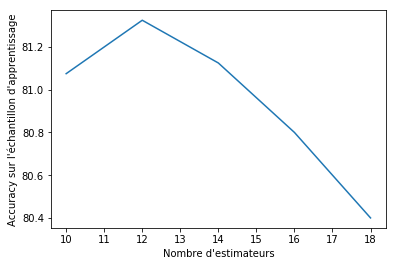

In [47]:
plt.plot(list(filter(lambda x: x % 2 == 0, list(range(10,20)))), cv_scores)
plt.xlabel("Nombre d'estimateurs")
plt.ylabel("Accuracy sur l'échantillon d'apprentissage")
plt.show()

### 4.4.4) Estimation du meilleur "max_depth"

In [55]:
max_d = filter(lambda x: x % 2 == 0, list(range(1,30)))
 
cv_scores2 = []
 
for i in max_d:
    rfc.set_params(max_depth=i)
    kfold2 = KFold(n_splits=10, random_state=seed)
    scores2 = model_selection.cross_val_score(rfc, X_train, y_train, cv=kfold2, scoring='accuracy')
    cv_scores2.append(scores2.mean()*100)
    


/Users/romain/anaconda/envs/python35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/romain/anaconda/envs/python35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/romain/anaconda/envs/python35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/romain/anaconda/envs/python35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/romain/anaconda/envs/python35/lib/python3.5/s

/Users/romain/anaconda/envs/python35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/romain/anaconda/envs/python35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/romain/anaconda/envs/python35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/romain/anaconda/envs/python35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/romain/anaconda/envs/python35/lib/python3.5/s

/Users/romain/anaconda/envs/python35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/romain/anaconda/envs/python35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/romain/anaconda/envs/python35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/romain/anaconda/envs/python35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/romain/anaconda/envs/python35/lib/python3.5/s

/Users/romain/anaconda/envs/python35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/romain/anaconda/envs/python35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/romain/anaconda/envs/python35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/romain/anaconda/envs/python35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/romain/anaconda/envs/python35/lib/python3.5/s

/Users/romain/anaconda/envs/python35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/romain/anaconda/envs/python35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/romain/anaconda/envs/python35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/romain/anaconda/envs/python35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/romain/anaconda/envs/python35/lib/python3.5/s

TypeError: 'filter' object is not subscriptable

In [59]:
list(max_d)

[]

In [60]:
optimal_max_d = list(max_d[cv_scores2.index(max(cv_scores2))])
print ("Le nombre optimal max_depth est %d avec %s "%(optimal_max_d, cv_scores2[optimal_max_d]))

TypeError: 'filter' object is not subscriptable

### 4.4.5) Représentation graphique

In [61]:
plt.plot(max_d, cv_scores2)
plt.xlabel("Max_depth")
plt.ylabel("Accuracy sur l'échantillon d'apprentissage")
plt.show()

RuntimeError: matplotlib does not support generators as input

Estimation du meilleur "min_samples_leaf"

In [62]:
leaf = filter(lambda x: x % 2 == 0, list(range(1,30)))
 
cv_scores3 = []
 
for i in leaf : 
    rfc.set_params(min_samples_leaf=i)
    kfold3 = KFold(n_splits=10, random_state=seed)
    scores3 = model_selection.cross_val_score(rfc, X_train, y_train, cv=kfold3, scoring='accuracy')
    cv_scores3.append(scores3.mean()*100)
    
optimal_leaf = leaf[cv_scores3.index(max(cv_scores3))]
print "Le nombre optimal min_samples_leaf est %d avec %0.1f%%" % (optimal_leaf, cv_scores3[optimal_leaf])

SyntaxError: invalid syntax (<ipython-input-62-54bbaee7898a>, line 12)

Représentation graphique

In [63]:
plt.plot(leaf, cv_scores3)
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy sur l'échantillon d'apprentissage")
plt.show()

NameError: name 'leaf' is not defined

Estimation des meilleurs paramètres pour le modèle : Cross Validation

In [ ]:
param_grid = { 
           "n_estimators" : [200, 500, 800, 1000],
           "max_depth" : [1, 5, 10, 15, 20, 25, 30],
           "min_samples_leaf" : [1, 2, 4, 6, 8, 10]
                }
 
grid_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10, scoring='accuracy')
grille_rfc=grid_rfc.fit(X_train, y_train)

<span style="color:red">
Il est dommage de ne pas aller plus loin avec la grille.
Globalement vous prenez à priori votre grille comme si elle contenait le meilleur paramétrage, alors que la grille n'ai qu'une aide pour aller chercher ce paramétrage. Il faudrait affiner la grille au fur et à mesure pour s'approcher d'un optimum
</span>

Meilleur paramètrage

In [ ]:
print(grille_rfc.best_params_)

Le meilleur modèle est celui avec le plus grand AUC (meilleure performance) :

In [ ]:
print(grille_rfc.best_score_)

### Prédiction

Prédiction avec le modèle « optimal » (meilleur paramètrage) :

In [ ]:
y_pred2 = grille.predict(X_test)

AUC avec l'échantillon test :

In [ ]:
print(accuracy_score(y_test, y_pred2))

Matrice de confusion :

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred2)
print(cnf_matrix)

In [ ]:
sns.heatmap(cnf_matrix, square=True, annot=True, cbar=False
            , xticklabels=list(projetTrain.target)
            , yticklabels=list(projetTrain.target)
plt.xlabel('valeurs prédites')
plt.ylabel('valeurs réelles');